## Some Basic Overview

Matplotlib is the python package for basic plotting. It holds many capabilities, as one can find in the documentation at the link https://matplotlib.org/users/index.html. However, It also contains a gallery examples, at this link https://matplotlib.org/gallery/index.html, from which I am going to use certain things.

In [1]:
import matplotlib.pyplot as plt

In [2]:
#Here goes our plotting data
x1 = [1,2,3,4,5]
y1 = [4,5,2,9,7]
y2 = [3,6,7,9,8]

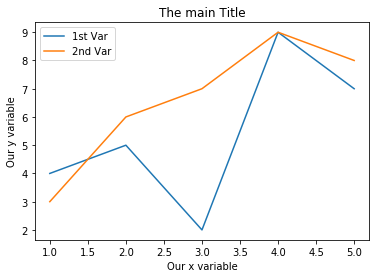

In [3]:
plt.plot(x1, y1, label="1st Var")
plt.plot(x1, y2, label="2nd Var")
plt.xlabel("Our x variable")
plt.ylabel("Our y variable")
plt.title("The main Title")
plt.legend()
plt.show()

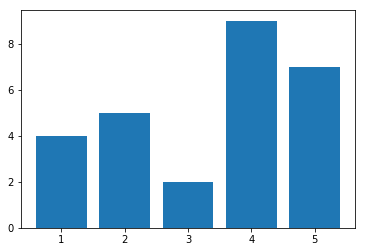

In [4]:
#bar diagram
plt.bar(x1, y1)
plt.show()

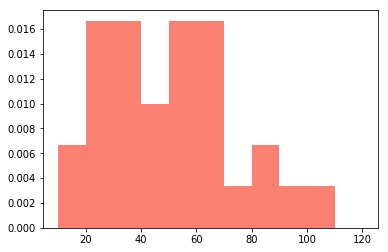

In [11]:
# histogram
pop_ages = [21, 22,45,6,57,33,34,87,76,67,56,85,25,65,23,45,67,90,34,55,67,23,56,100,13,11,45,64,33,35,57]
bins = [10,20,30,40,50,60,70,80,90,100,110,120]
plt.hist(pop_ages, bins, histtype="bar", density=True, color="salmon")
plt.show()

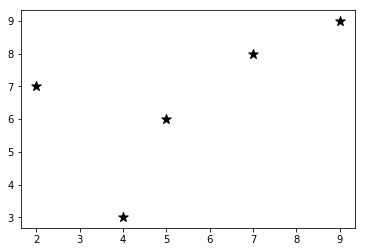

In [15]:
#scatterplot
plt.scatter(y1, y2, color="k", marker="*",s=100)
#color "k" implies black, marker means the symbol to plot and "s" is the size argument.
plt.show()

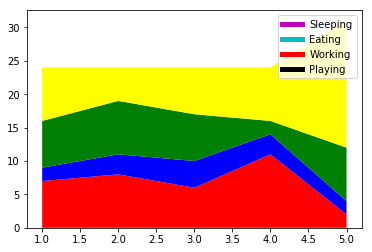

In [21]:
#stackplot data first
days = [1,2,3,4,5]
sleeping = [7,8,6,11,2]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,8]
playing =  [8,5,7,8,19]

#for legend purpose, we plot empty list
plt.plot([],[],color='m', label='Sleeping', linewidth=5)
plt.plot([],[],color='c', label='Eating', linewidth=5)
plt.plot([],[],color='r', label='Working', linewidth=5)
plt.plot([],[],color='k', label='Playing', linewidth=5)

#stackplot diagram
plt.stackplot(days, sleeping, eating, working, playing, colors = ['red','blue','green','yellow'])
plt.legend()
plt.show()

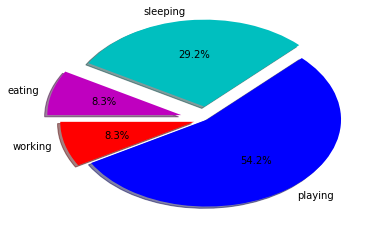

In [29]:
slices = [7,2,2,13]
activities = ['sleeping','eating','working','playing']
cols = ['c','m','r','b']

plt.pie(slices,
        labels=activities,
        colors=cols,
        explode = (0.15,0.2,0.1,0),
        autopct='%1.1f%%',
        shadow=True, 
        startangle=45)
# explode is the way to taking out pieces of pie chart, autopct shows percentage, shadow shows shadows.
plt.show()

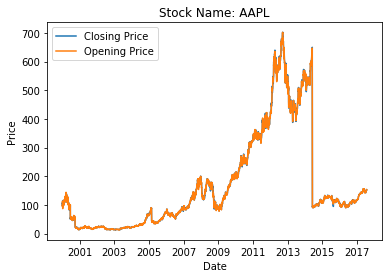

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates

def date2num(fmt, encoding = 'utf-8'):
    strconverter = mdates.strpdate2num(fmt)  #returns a function that can convert string to dates
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

## function of getting stock prices
def graph_stock(stock):
    url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []  #an empty list, we append things later
    source_code_splited = source_code.split('\n')
    
    ## we see that the first line of the splitted thing is the header, so we conisder from 1 to the rests
    for line in source_code_splited[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            #if there are 7 elements along with the date, and six variables
            stock_data.append(line)
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: date2num('%Y-%m-%d')})
                                                                      # this conversion function is used on 0-th column i.e. the date
    #now, finally the plotting
    plt.plot_date(date, closep, fmt = '-',label = "Closing Price") #plot the closing price
    # plt.plot_date(date, openp, fmt = '-',label = "Opening Price")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Stock Name: " + stock)
    plt.legend()
    plt.show() #show the final plot
                                                                      
                                                                      
graph_stock('AAPL')

## From Beginner to Advanced with Matplotlib

Link: https://matplotlib.org/gallery/#pyplot

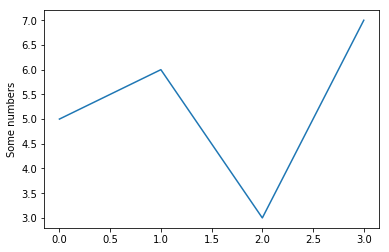

In [13]:
import matplotlib.pyplot as plt
a = [5,6,3,7]
plt.plot(a)
plt.ylabel("Some numbers")
plt.show()

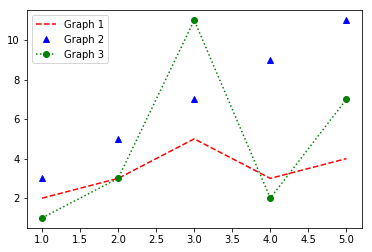

In [16]:
## Now, we should learn about formatstring
## the format string is the the set of three values,     [color][markers][line]
## [color] = r (red) or b(blue) or k(black) or g(green)....
## [markers] = o (for points) or v (triangle down) or ^ (triangle up) or * (star) or D (diamond)
## [line] = - (for simple line) or -- (for dashed line) or -. (for dash dot) or : (for dot dot line)

plt.plot([1,2,3,4,5], [2,3,5,3,4], 'r--', label = "Graph 1")  #red dashed line
plt.plot([1,2,3,4,5], [3,5,7,9,11],'b^', label = "Graph 2")  #blue triangluar up arrow
plt.plot([1,2,3,4,5], [1,3,11,2,7], 'go:', label = "Graph 3")
plt.legend()
plt.show()

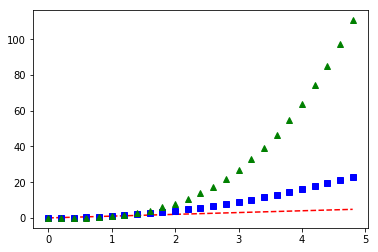

In [20]:
import numpy as np
t = np.arange(0.0, 5.0, 0.2)  #create  a sequence of 0 to 5 (excluding 5) by 0.2

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')  ## we can pass all of these plots together on the same axis
plt.show()

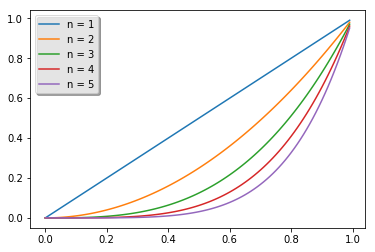

In [16]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 1.0, 0.01)
for n in [1,2,3,4,5]:
    plt.plot(t, t**n, label = 'n = '+str(n))
leg = plt.legend(shadow=True,loc = "best")   #loc can be right, upper right, center right, lower right, upper left, center left, lower left etc. 
# use expand = True to set the legend to fit the horizontal length
leg.get_frame().set_alpha(0.7)  #sets the transparency
plt.show()

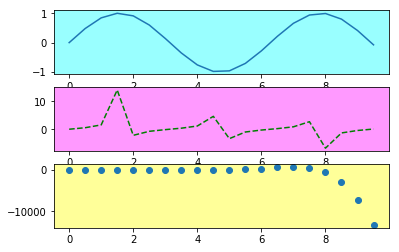

In [25]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 10.0, 0.5)  #a range of values as time
sines = np.sin(t)
tans = np.tan(t)
exp = np.cos(t)*np.exp(t)

#to make subplots, subplot arguments are a little tricky.
# subplot(nrows, ncols, index)   i.e. number of rows, number of cols, followed by the index of the subplot to work on.
# the index is given in 1 to (nrows*ncols) in row major order.
# finally, if nrows, ncols and index all are less than 10, they can be given as a three digit number by concatinating.

plt.subplot(311, facecolor = '#99ffff')  #facecolor is the background color
plt.plot(t, sines)

plt.subplot(312, facecolor = '#ff99ff')
plt.plot(t, tans, 'g--')

plt.subplot(313, facecolor = '#ffff99')
plt.plot(t, exp, 'o')

plt.show()

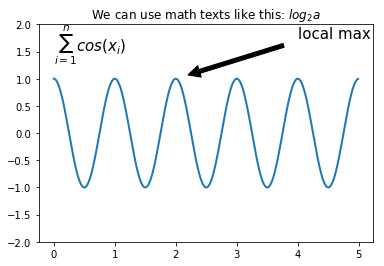

In [39]:
## Plot annotating
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # returns the figure object, along with axis

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)   # draw a plot based on that axis, lw = line width

ax.annotate('local max', xy=(2, 1), xytext=(4, 1.75),
            arrowprops=dict(facecolor='black', shrink=0.1), fontsize = 15)
            # arguments, 'text', then where to annotate, then where to show the text, 
            # arrowprops define arrow characteristics, shirk is how much distance should the arrow keep from the curve
        
ax.annotate(r'$\sum_{i=1}^n{cos(x_i)}$', xy=(1,1), xytext = (0, 1.5), fontsize = 15)
ax.set_ylim(-2, 2)
plt.title(r'We can use math texts like this: $log_2{a}$')
plt.show()

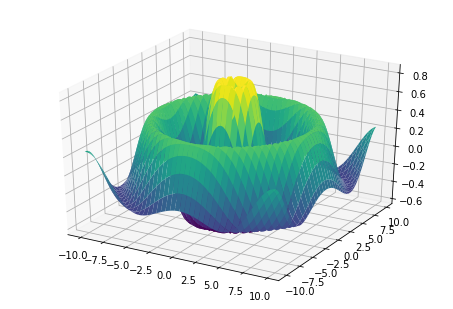

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm  # for colors

X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)   #create a grid with x's and y's
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)*np.exp(-0.1*R)

fig = plt.figure()  #get a new blank figure
ax = Axes3D(fig)   # add a 3d axis
ax.plot_surface(X, Y, Z, cmap = cm.viridis)

plt.show()

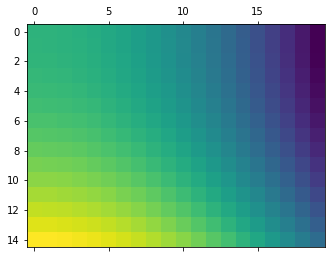

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def matrix(dim):
    mat = np.zeros(dim)
    for i in range(dim[0]):
        for j in range(dim[1]):
            mat[i,j] = (i**2 - j**2)
    return mat

plt.matshow(matrix([15,20]))  #shows the matrix
plt.show()

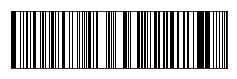

In [34]:
## Printing a Barcode
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(3082018)  # set a seed
randoms = np.random.rand(500)  #get 500 random numbers

x = np.where(randoms> 0.5, 1.0, 0.0)   # where the condition randoms > 0.7 holds, we set equal to 0.1, else set 0.0

axprops = dict(xticks=[], yticks=[])   #passing it will disable the axes
barprops = dict(aspect='auto', cmap=plt.cm.binary, interpolation='nearest')   #this will allow a barcode looking structure

fig = plt.figure()
ax = fig.add_axes([0.4, 0.2, 0.5, 0.2], **axprops)      ## intial position (x, y value) , then length of axis
ax.imshow(x.reshape((1, -1)), **barprops)

plt.show()

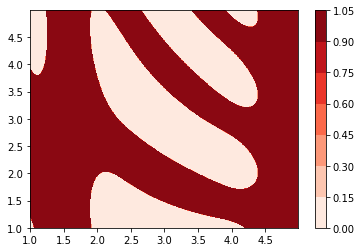

In [18]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# first the resolution size
dx, dy = 0.01, 0.01   #usually chosen to be same

y, x = np.mgrid[slice(1, 5, dy), slice(1,5, dx)]  #create a 2d meashgrid
z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)
z = np.where(z > 0.3, 1.0, 0.0)

fig, ax = plt.subplots()
cf = ax.contourf(x, y, z, cmap = cm.Reds)
fig.colorbar(cf, ax = ax)
plt.show()

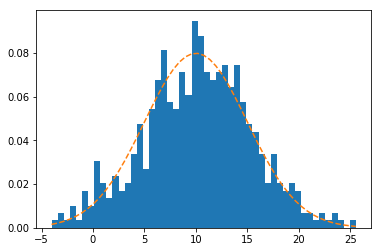

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(loc= 10, scale = 5, size = 500)
num_bins = 50

fig, ax = plt.subplots()
n ,bins, patches = ax.hist(x, num_bins, density = True)   #does a histogram with densities
y = ((1 / (np.sqrt(2 * np.pi) * 5)) * np.exp(-0.5 * (1 / 5 * (bins - 10))**2))
ax.plot(bins, y, '--')

plt.show()

In [32]:
#Working with Image in Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('./stinkbug.png')  #read an image and stores into numpy array
print(img)

[[ 0.40784314  0.40784314  0.40784314 ...,  0.42745098  0.42745098
   0.42745098]
 [ 0.41176471  0.41176471  0.41176471 ...,  0.42745098  0.42745098
   0.42745098]
 [ 0.41960785  0.41568628  0.41568628 ...,  0.43137255  0.43137255
   0.43137255]
 ..., 
 [ 0.43921569  0.43529412  0.43137255 ...,  0.45490196  0.4509804
   0.4509804 ]
 [ 0.44313726  0.44313726  0.43921569 ...,  0.4509804   0.44705883
   0.44705883]
 [ 0.44313726  0.4509804   0.4509804  ...,  0.44705883  0.44705883
   0.44313726]]


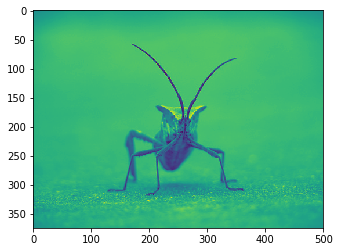

In [28]:
plt.imshow(img)

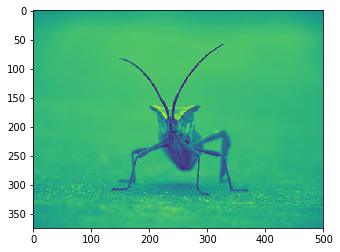

In [29]:
# horizontal flip
plt.imshow(img[:, ::-1])

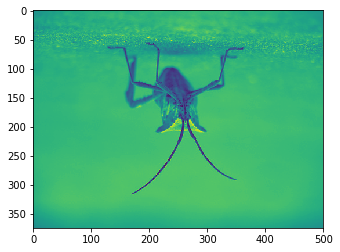

In [30]:
#vertical flip
plt.imshow(img[::-1,:])

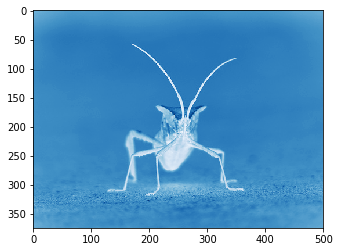

In [40]:
imgplot = plt.imshow(img)
imgplot.set_cmap('Blues')  #the blue channel

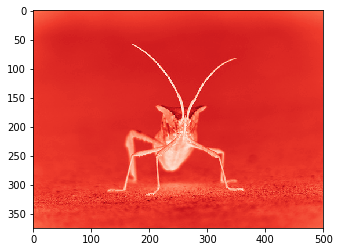

In [41]:
imgplot = plt.imshow(img)
imgplot.set_cmap('Reds')  #the red channel

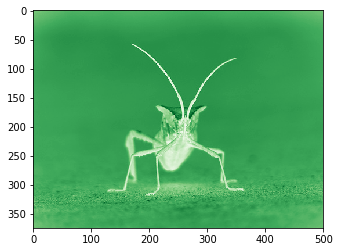

In [42]:
imgplot = plt.imshow(img)
imgplot.set_cmap('Greens')  #the green channel